# 회귀분석 실습

In [1]:
import os
import warnings

warnings.simplefilter(action='ignore',category=FutureWarning)

import pandas as pd
import numpy as np
import math
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name=='nt':
    font_family="Malgun Gothic"
else:
    font_family="AppleGothic"

sns.set(font=font_family,rc={"axes.unicode_minus":False})

## 1. 데이터셋

In [2]:
from sklearn.datasets import load_diabetes

data = load_diabetes()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["target"] = data.target

df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


## 1. 단순선형회귀분석

### 1) 데이터 탐색

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


<AxesSubplot:xlabel='bmi', ylabel='target'>

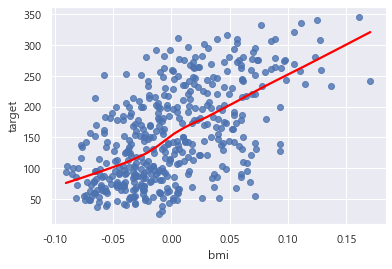

In [4]:
sns.regplot('bmi', 'target', lowess=True, line_kws={'color' : 'red'}, data = df)

Text(0.5, 1.0, 'rate')

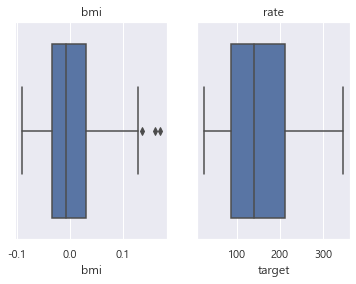

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.boxplot('bmi', data=df, ax=ax1)
ax1.set_title('bmi')

sns.boxplot('target', data=df, ax=ax2)
ax2.set_title('rate')

Text(0.5, 1.0, 'rate')

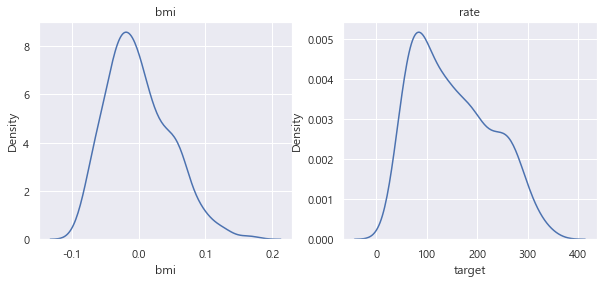

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(df['bmi'], ax=ax1)
ax1.set_title('bmi')

sns.kdeplot(df['target'], ax=ax2)
ax2.set_title('rate')

In [7]:
import scipy.stats

print(scipy.stats.skew(df['bmi']))
print(scipy.stats.skew(df['target']))

0.5961166556214368
0.43906639932477265


### 2) 단순선형회귀 - sklearn

In [8]:
X = df.bmi.values
y = df.target.values

l_train_X1 = X.reshape(-1,1)
l_test_y1 = y.reshape(-1,1)

print(X.shape)
print(l_train_X1.shape)

(442,)
(442, 1)


In [9]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(l_train_X1, l_test_y1)

LinearRegression()

In [10]:
print(lr_model.coef_[0])
print(lr_model.intercept_)

[949.43526038]
[152.13348416]


In [11]:
lr_model.predict([[-2],[-1],[0],[1],[2]])

array([[-1746.73703661],
       [ -797.30177622],
       [  152.13348416],
       [ 1101.56874455],
       [ 2051.00400493]])

In [14]:
lr_prediction = lr_model.predict(l_train_X1)
lr_residuals = l_test_y1 - lr_prediction

In [15]:
SSE = (lr_residuals**2).sum()
SST = ((l_test_y1-l_test_y1.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ', R_squared)

R_squared:  0.3439237602253802


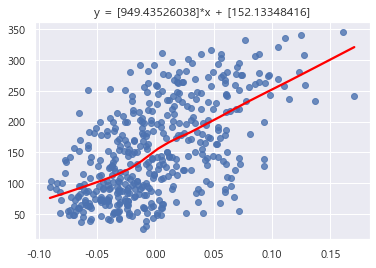

In [16]:
sns.regplot(l_train_X1, l_test_y1, lowess=True, line_kws={'color':'red'}, data = df)
plt.title('y = {}*x + {}'.format(lr_model.coef_[0], lr_model.intercept_))
plt.show()

### 3) 단순선형회귀 통계적 분석

In [17]:
from statsmodels.formula.api import ols

res_sr = ols('target ~ bmi', data=df).fit()

In [18]:
res_sr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     230.7
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           3.47e-42
Time:                        10:32:04   Log-Likelihood:                -2454.0
No. Observations:                 442   AIC:                             4912.
Df Residuals:                     440   BIC:                             4920.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301
==============================================================================
Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 2. 다중선형회귀 모델

### 1) 데이터 탐색

In [19]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


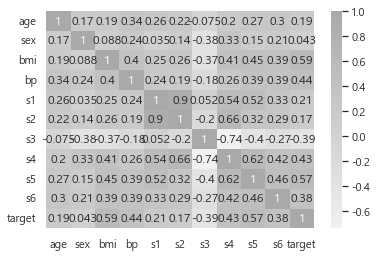

In [20]:
cmap = sns.light_palette("darkgray", as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap=cmap)
plt.show()

### 2) 다중선형회귀분석 - sklearn

In [22]:
dlr_train_X_df = df.copy()
dlr_train_X_df = dlr_train_X_df.drop("target", 1)

dlr_test_y = df.target.values
dlr_test_y = dlr_test_y.reshape(-1,1)

In [23]:
dlr_model = LinearRegression()

dlr_model.fit(X = dlr_train_X_df, y = dlr_test_y)

print('절편: ', dlr_model.intercept_)
print('회귀계수: ', dlr_model.coef_)

절편:  [152.13348416]
회귀계수:  [[ -10.0098663  -239.81564367  519.84592005  324.3846455  -792.17563855
   476.73902101  101.04326794  177.06323767  751.27369956   67.62669218]]


In [24]:
prediction = dlr_model.predict(dlr_train_X_df)
residuals = dlr_test_y - prediction

In [28]:
SSE = (residuals**2).sum()
SST = ((dlr_test_y-dlr_test_y.mean())**2).sum()
R_squared = 1 - (SSE/SST)
print('R_squared: ',R_squared)

R_squared:  0.5177484222203499


In [30]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(dlr_test_y, prediction)
print(mse)
rmse = sqrt(mse)
print(rmse)

print('score = ', dlr_model.score(X=dlr_train_X_df, y=dlr_test_y))
print('mean_squared_error = ', mse)
print('RMSE = ', rmse)

2859.6963475867497
53.47612876402657
score =  0.5177484222203499
mean_squared_error =  2859.6963475867497
RMSE =  53.47612876402657


### 3) 다중선형회귀분석 - 통계적 데이터 분석

In [31]:
print(df.shape)
df.head(3)

(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0


In [32]:
from statsmodels.formula.api import ols

s_d_model = ols('target ~ age+sex+bmi+s1+s2+s3+s4+s5+s6', df)

In [33]:
m_result = s_d_model.fit()

In [34]:
m_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     46.16
Date:                Wed, 20 Jul 2022   Prob (F-statistic):           6.85e-58
Time:                        10:50:41   Log-Likelihood:                -2398.3
No. Observations:                 442   AIC:                             4817.
Df Residuals:                     432   BIC:                             4857.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    152.1335      2.645     57.512      0.000     146.934     157.333
age           46.3263     60.239      0.769      0.442     -72.072     164.724
sex         -182.5981     61.744     -2.957      0.003    -303.955     -61.241
bmi          599.4186     66.308      9.040      0.000     469.092     729.745
s1          -715.4123    427.608     -1.673      0.095   -1555.862     125.038
s2           437.5523    348.068      1.257      0.209    -246.564    1121.669
s3            66.2071    218.137      0.304      0.762    -362.534     494.948
s4           104.4101    165.141      0.632      0.528    -220.170     428.990
s5           799.5323    176.247      4.536      0.000     453.124    1145.940
s6           119.1782     66.915      1.781      0.076     -12.342     250.698
==============================================================================
Omnibus:                        2.776   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.250   Jarque-Bera (JB):                2.316
Skew:                           0.059   Prob(JB):                        0.314
Kurtosis:                       2.666   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4) 다중공선성 확인

In [35]:
### VIF(분산팽창요인) 계산 - 10이 넘어가는 값 => 다중공선성 판단
from statsmodels.stats.outliers_influence import variance_inflation_factor

print(s_d_model.exog_names)

print(variance_inflation_factor(s_d_model.exog, 1))

pd.DataFrame({'컬럼': column, 'VIF': variance_inflation_factor(s_d_model.exog, i)}
            for i, column in enumerate(s_d_model.exog_names)
            if column != 'Intercept')

['Intercept', 'age', 'sex', 'bmi', 's1', 's2', 's3', 's4', 's5', 's6']
1.1732878941436908


,컬럼,VIF
0,age,1.173288
1,sex,1.232664
2,bmi,1.421618
3,s1,59.120782
4,s2,39.172072
5,s3,15.385324
6,s4,8.817776
7,s5,10.043667
8,s6,1.447764


### 5) 잔차 분석

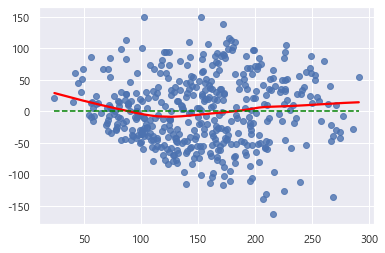

In [40]:
s_d_res_fit = m_result.predict(df)
s_d_residuals = df['target'] - s_d_res_fit

sns.regplot(s_d_res_fit, s_d_residuals, lowess=True, line_kws={'color': 'red'})
plt.plot([s_d_res_fit.min(), s_d_res_fit.max()], [0, 0], '--', color='green')

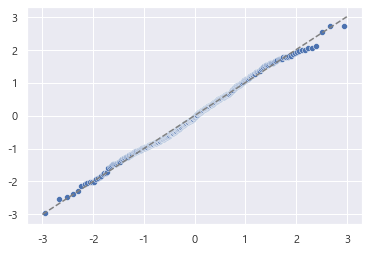

In [41]:
s_d_sr = stats.zscore(s_d_residuals)
(s_d_x, s_d_y), _ = stats.probplot(s_d_sr)

sns.scatterplot(s_d_x, s_d_y)
plt.plot([-3, 3], [-3, 3], '--', color='grey')

<AxesSubplot:>

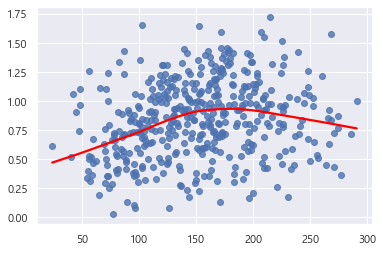

In [42]:
sns.regplot(s_d_res_fit, np.sqrt(np.abs(s_d_sr)), lowess=True, line_kws={'color':'red'})

In [43]:
from statsmodels.stats.outliers_influence import OLSInfluence
cd, _ = OLSInfluence(m_result).cooks_distance
cd.sort_values(ascending=False).head()

382    0.031351
123    0.023941
304    0.021760
58     0.020292
289    0.018091
dtype: float64